In [2]:
#Atividade

In [1]:
#importacao das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression



In [2]:
!pip install scikit-learn==0.23.0

from numpy.ma import MaskedArray
import sklearn.utils.fixes

sklearn.utils.fixes.MaskedArray = MaskedArray

1. Importando a base de dados

In [34]:
#importação da base de dados

#dados de treino
train = pd.read_csv("adult.csv", na_values = "?")
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [36]:
train.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


2. Ajustando a base de dados/ Limpeza dos dados

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [39]:
train['income'] = le.fit_transform(train['income'])
train['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

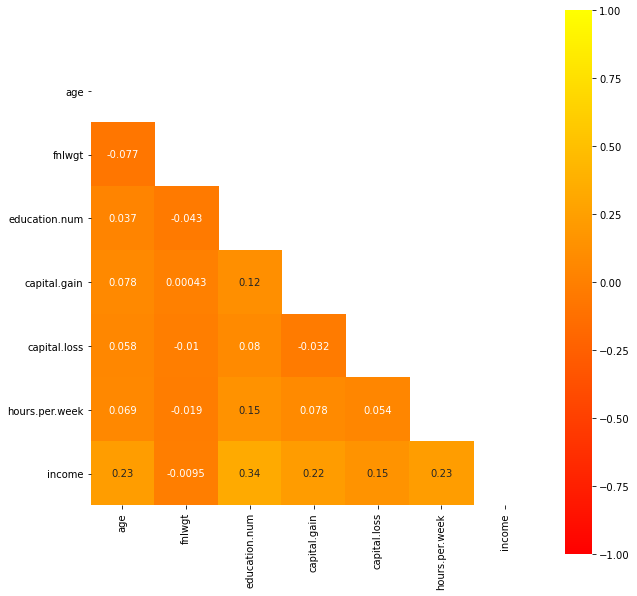

In [40]:
plt.figure(figsize=(10,10))

mask = np.triu(np.ones_like(train.corr(), dtype = bool))
sns.heatmap(train.corr(), mask = mask, square = True, annot = True, vmin=-1, vmax=1, cmap='autumn')

plt.show()

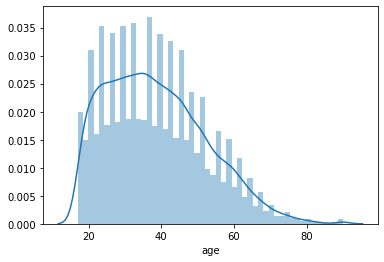

In [41]:
sns.distplot(train['age'])

In [42]:
train.shape

(32561, 15)

In [43]:
train.drop_duplicates(keep='first', inplace = True)

In [44]:
train.shape

(32537, 15)

In [45]:
#Falar do motivo de tirar essas classes
train = train.drop(['fnlwgt', 'native.country','education'], axis = 1)

train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,0
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,0
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,0
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,0


In [46]:
#Verificação se tem dados vazios.
train.isnull().sum()

age                  0
workclass         1836
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

In [47]:
#divisão entre o target e as outras variáveis
target = train.pop('income')
atributos = train

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40


In [48]:
#X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.25, random_state=42)
X_train = atributos
Y_train = target

In [49]:
# Seleciona as variáveis numéricas
numerical_cols = list(X_train.select_dtypes(include=[np.number]).columns.values)

# Remove as variáveis numéricas esparsas
numerical_cols.remove('capital.gain')
numerical_cols.remove('capital.loss')

# Seleciona as variáveis numéricas esparsas
sparse_cols = ['capital.gain', 'capital.loss']

# Seleciona as variáveis categóricas
categorical_cols = list(X_train.select_dtypes(exclude=[np.number]).columns.values)

# Mostrando as diferentes seleções
print("Colunas numéricas: ", numerical_cols)
print("Colunas esparsas: ", sparse_cols)
print("Colunas categóricas: ", categorical_cols)


Colunas numéricas:  ['age', 'education.num', 'hours.per.week']
Colunas esparsas:  ['capital.gain', 'capital.loss']
Colunas categóricas:  ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex']


In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Cria a nossa pipeline categórica
categorical_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(drop='if_binary'))
])


from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
# Cria a nossa pipeline numérica
numerical_pipeline = Pipeline(steps = [
    ('imputer', KNNImputer(n_neighbors=10, weights="uniform")),
    ('scaler', StandardScaler())
])

from sklearn.preprocessing import RobustScaler

sparse_pipeline = Pipeline(steps = [
    ('imputer', KNNImputer(n_neighbors=10, weights="uniform")),
    ('scaler', RobustScaler())
])


from sklearn.compose import ColumnTransformer

# Cria o nosso Pré-Processador

# Cada pipeline está associada a suas respectivas colunas no datast
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_pipeline, numerical_cols),
    ('spr', sparse_pipeline, sparse_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

In [51]:
X_train = preprocessor.fit_transform(X_train)
X_train

<32537x46 sparse matrix of type '<class 'numpy.float64'>'
	with 286302 stored elements in Compressed Sparse Row format>

In [52]:
X_train

<32537x46 sparse matrix of type '<class 'numpy.float64'>'
	with 286302 stored elements in Compressed Sparse Row format>

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train ,test_size =0.2,random_state = 42)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Instancia nosso classificador
knn = KNeighborsClassifier(n_neighbors=20)

In [57]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X_train, y_train, cv = 5, scoring="accuracy")
print("Acurácia com cross validation:", score.mean())

Acurácia com cross validation: 0.8661491672765076


In [60]:
!pip install scikit-optimize

  Using cached scikit_optimize-0.8.1-py2.py3-none-any.whl (101 kB)
  Using cached pyaml-20.4.0-py2.py3-none-any.whl (17 kB)


In [91]:
# Importa o Bayes Search:
from skopt import BayesSearchCV

from sklearn.model_selection import ShuffleSplit

# Importa o espaço de busca inteiro
from skopt.space import Integer

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)


# Cria o Bayes Search:
bayes_search_cv = BayesSearchCV(estimator = KNeighborsClassifier(),
                              search_spaces = {'n_neighbors': Integer(10, 50),}, # Vizinhos de 10 a 50
                              cv = cv,
                              n_iter = 12, random_state=42)

# Realizando a otimização por BayesSearch:
bayes_search_cv.fit(X_train, y_train)

best_param = bayes_search_cv.best_params_['n_neighbors']

print('Melhor quantidade de vizinhos: {}'.format(bayes_search_cv.best_params_['n_neighbors']))
print('Desempenho do melhor modelo: {}'.format(round(bayes_search_cv.best_score_,5)))

Melhor quantidade de vizinhos: 26
Desempenho do melhor modelo: 0.86412


In [64]:
%%time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(class_weight='balanced',random_state=42)
param_grid = { 
    'C': [0.1,0.2,0.3,0.4],
    'penalty': ['l1', 'l2'],
    'class_weight':[{0: 1, 1: 1},{ 0:0.67, 1:0.33 },{ 0:0.75, 1:0.25 },{ 0:0.8, 1:0.2 }]}
CV_rfc = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'C': 0.2, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2'}
Wall time: 13.6 s


Random Forrest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Instancia nosso classificador
rfc = RandomForestClassifier(random_state=42)

In [69]:
# Cria o Bayes Search:
rfc_search_cv = BayesSearchCV(estimator = rfc,
                              search_spaces = {'n_estimators': Integer(100, 500),
                                               'criterion': ['gini', 'entropy'],
                                               'max_depth': Integer(1, 50),},
                              cv = 5,
                              n_iter = 20, n_jobs=-1, random_state=42)

# Realizando a otimização por BayesSearch:
%timeit -n 1 -r 1 rfc_search_cv.fit(X_train, y_train)

print('Melhores hiperparâmetros: {}'.format(rfc_search_cv.best_params_))
print('Desempenho do melhor modelo: {}'.format(round(rfc_search_cv.best_score_,5)))

16min 33s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Melhores hiperparâmetros: OrderedDict([('criterion', 'entropy'), ('max_depth', 17), ('n_estimators', 500)])
Desempenho do melhor modelo: 0.86315


Multi Layer Perceptron

In [70]:
from sklearn.neural_network import MLPClassifier

# Instancia nosso classificador
mlp = MLPClassifier(random_state=42, early_stopping=True)

In [72]:
from scipy.stats import loguniform as sp_loguniform
from sklearn.model_selection import RandomizedSearchCV

# Hiperparâmetros a serem otimizados
hyperparams = {'hidden_layer_sizes': [(2 ** i, 2 ** j) for j in np.arange(5, 8) for i in np.arange(4, 7)],
               'alpha': sp_loguniform(1e-10, 1e-1),
               'learning_rate': ['constant','adaptive']}

# Busca de Hiperparâmetros
mlp_search_cv = RandomizedSearchCV(mlp, hyperparams, scoring='accuracy', n_iter=25, cv=3, n_jobs=-1, random_state=42)
%timeit -n 1 -r 1 mlp_search_cv.fit(X_train, y_train)

print('Melhores hiperparâmetros: {}'.format(mlp_search_cv.best_params_))
print('Desempenho do melhor modelo: {}'.format(round(mlp_search_cv.best_score_,5)))

2min 3s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Melhores hiperparâmetros: {'alpha': 7.718006993806051e-07, 'hidden_layer_sizes': (16, 32), 'learning_rate': 'constant'}
Desempenho do melhor modelo: 0.85658


# Comparação dos Modelos

## Classificador KNN

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [88]:
# Calculando a AUC do KNN
knn_roc_auc = roc_auc_score(y_test, bayes_search_cv.predict_proba(X_test)[:,1])

# Calculando a acurácia do KNN
knn_acc = accuracy_score(y_test, bayes_search_cv.predict(X_test))

print('AUC -------- KNN: {:.4f}'.format(knn_roc_auc))
print('Acurácia --- KNN: {:.4f}'.format(knn_acc))

AUC -------- KNN: 0.9219
Acurácia --- KNN: 0.8737


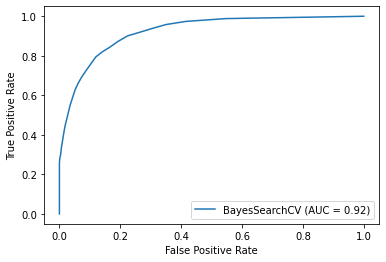

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(bayes_search_cv, X_test, y_test)
plt.show()

In [90]:
# Calculando a AUC da Random Forrest
rfc_roc_auc = roc_auc_score(y_test, rfc_search_cv.predict_proba(X_test)[:,1])

# Calculando a acurácia da Random Forest
rfc_acc = accuracy_score(y_test, rfc_search_cv.predict(X_test))

print('AUC -------- Random Forest: {:.4f}'.format(knn_roc_auc))
print('Acurácia --- Random Forest: {:.4f}'.format(knn_acc))

AUC -------- Random Forest: 0.9219
Acurácia --- Random Forest: 0.8737


In [78]:
# Calculando a AUC da Rede Neural
mlp_roc_auc = roc_auc_score(y_test, mlp_search_cv.predict_proba(X_test)[:,1])

# Calculando a acurácia da Rede Neural
mlp_acc = accuracy_score(y_test, mlp_search_cv.predict(X_test))

print('AUC -------- Rede Neural: {:.4f}'.format(mlp_roc_auc))
print('Acurácia --- Rede Neural: {:.4f}'.format(mlp_acc))

AUC -------- Rede Neural: 0.9056
Acurácia --- Rede Neural: 0.8500


In [80]:
from sklearn.metrics import classification_report

In [81]:
knn_pred = bayes_search_cv.predict(X_test)
rfc_pred = rfc_search_cv.predict(X_test)
mlp_pred = mlp_search_cv.predict(X_test)

In [82]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4988
           1       0.77      0.66      0.71      1520

    accuracy                           0.87      6508
   macro avg       0.83      0.80      0.81      6508
weighted avg       0.87      0.87      0.87      6508



In [83]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4988
           1       0.77      0.60      0.68      1520

    accuracy                           0.87      6508
   macro avg       0.83      0.77      0.80      6508
weighted avg       0.86      0.87      0.86      6508



In [84]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4988
           1       0.68      0.67      0.68      1520

    accuracy                           0.85      6508
   macro avg       0.79      0.79      0.79      6508
weighted avg       0.85      0.85      0.85      6508



In [92]:
# Calculando a acurácia do KNN
knn_acc = accuracy_score(y_train, bayes_search_cv.predict(X_train))

print('Acurácia --- KNN: {:.4f}'.format(knn_acc))

Acurácia --- KNN: 0.8758


In [86]:
# Calculando a acurácia da Rede Neural
mlp_acc = accuracy_score(y_train, mlp_search_cv.predict(X_train))

print('Acurácia --- Rede Neural: {:.4f}'.format(mlp_acc))

Acurácia --- Rede Neural: 0.8532


In [87]:
# Calculando a acurácia da Random Forest
rfc_acc = accuracy_score(y_train, rfc_search_cv.predict(X_train))

print('Acurácia --- Random Forest: {:.4f}'.format(knn_acc))

Acurácia --- Random Forest: 0.8758
